In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [4]:
df = pd.read_csv('2022-04-17 final_homework_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parent Category  617 non-null    object 
 1   Product Type     617 non-null    object 
 2   Category         617 non-null    object 
 3   Display Name     617 non-null    object 
 4   Color Category   617 non-null    object 
 5   Gender           617 non-null    object 
 6   Warmth Factor    617 non-null    int64  
 7   orders           617 non-null    float64
 8   revenue          617 non-null    float64
 9   cost             617 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 48.3+ KB


In [5]:
df.head()

,Parent Category,Product Type,Category,Display Name,Color Category,Gender,Warmth Factor,orders,revenue,cost
0,Clothing,Bottoms,Core Mountain,Attack Pant,Camo,Mens,2,135031.0,20349998.27,150.71
1,Clothing,Bottoms,Core Mountain,Attack Pant,Solid,Mens,2,126443.0,18921709.90,149.65
2,Clothing,Jackets and Vests,Core Mountain,Guide DCS Jacket,Camo,Mens,3,101707.0,23499045.15,231.05
3,Clothing,Bottoms,Core Mountain,Guide Pant,Camo,Mens,2,52175.0,9408110.47,180.32
4,Clothing,Tees,Core Mountain,ULTRA Merino 125 LS Crew-T,Camo,Mens,2,44910.0,3959173.02,88.16


In [6]:
feature_cols = ['Parent Category', 'Product Type', 'Category', 'Color Category', 'Gender', 'Warmth Factor']

X = df[feature_cols]
y = df['cost']

In [7]:
#I tried to stratify the data, but kept getting this error: 
#ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
#After Googling and chatting w/ Austin (from the class), I put in the "test_size=.33"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.33, random_state = 72)

In [8]:
transformer = make_column_transformer((OneHotEncoder(), ['Parent Category', 'Product Type', 'Category', 'Color Category', 'Gender']),
                                    remainder = 'passthrough')

In [9]:
X_train_ohe = transformer.fit_transform(X_train)

In [10]:
X_test_ohe = transformer.transform(X_test)

In [12]:
X_train_ohe

<413x36 sparse matrix of type '<class 'numpy.float64'>'
	with 2478 stored elements in Compressed Sparse Row format>

In [54]:
dtree = DecisionTreeRegressor(max_depth = 5, ccp_alpha = .1, random_state = 42).fit(X_train_ohe, y_train)

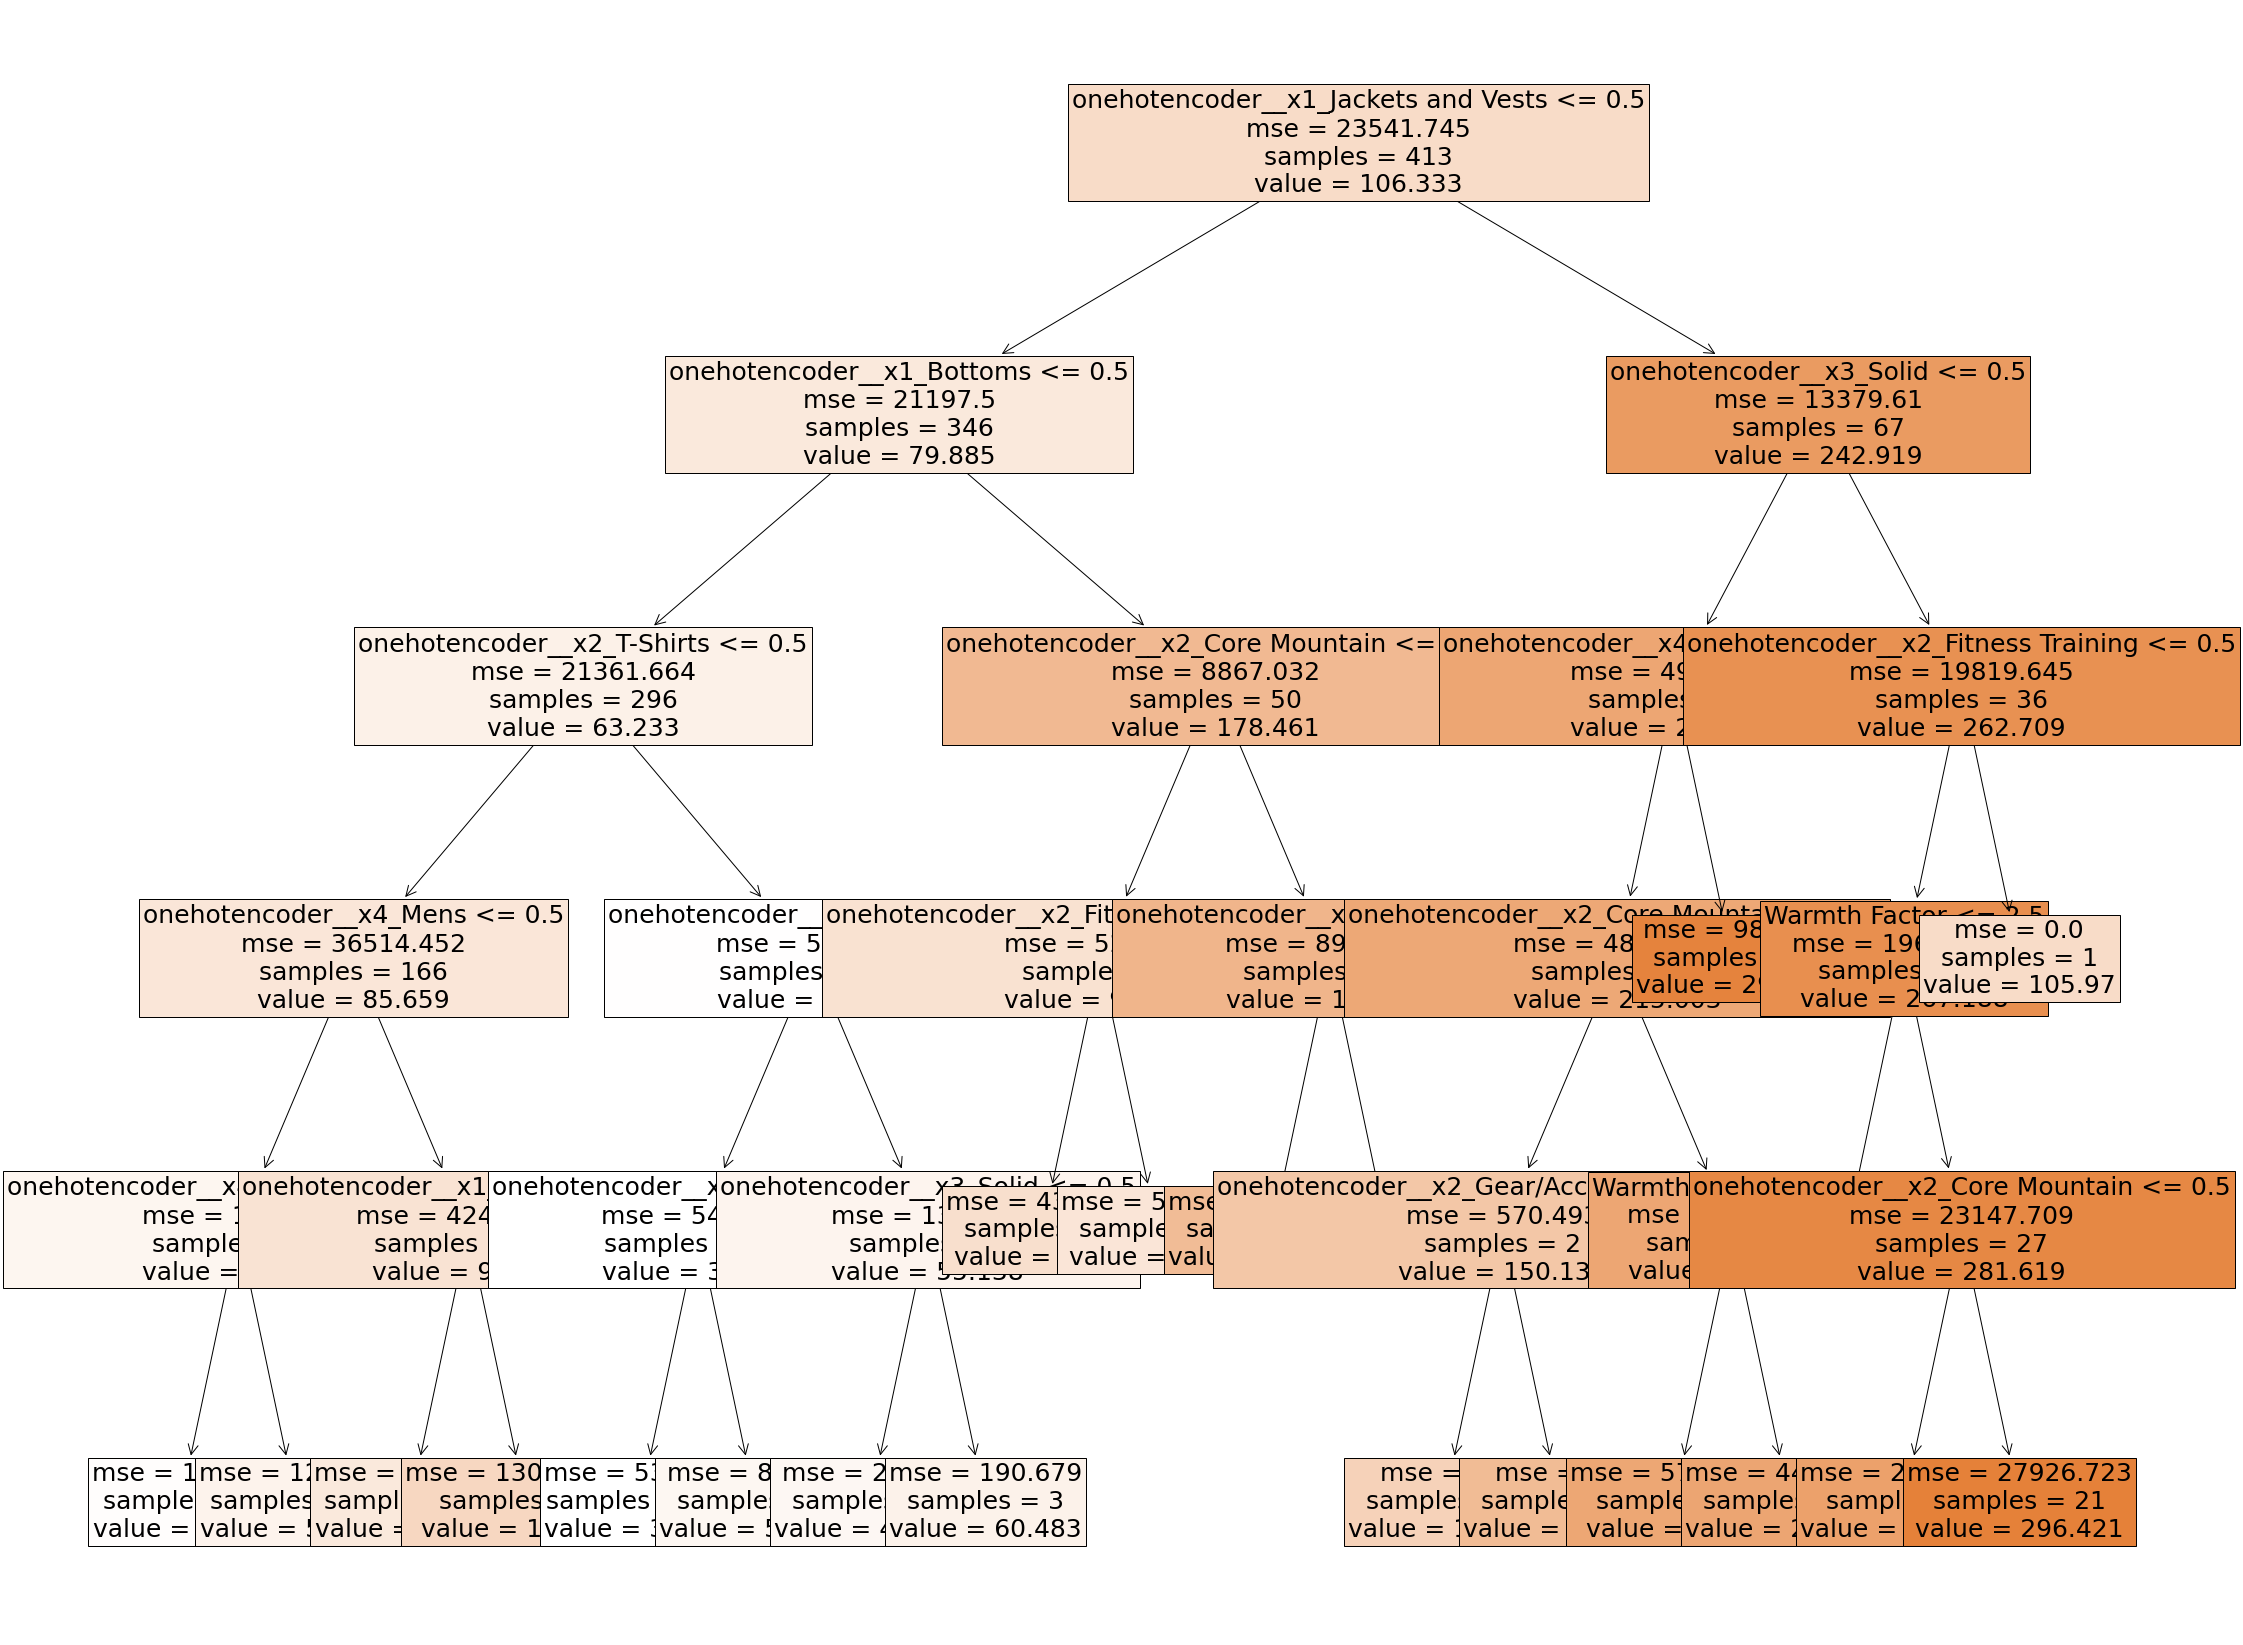

In [55]:
#TBH, I mostly don't know what I'm looking at :( Also - I have no comparison for what my MSE should be, so what model should I use to have a point of comparison? Also, is the "value" what the predicted price should be? 
fig, ax = plt.subplots(figsize = (35,30))
plot_tree(dtree, feature_names = transformer.get_feature_names(),
         fontsize = 25, ax = ax, filled = True);

In [49]:
#I definitely didn't expect the features are the individual categories - I expected there to be only ['Parent Category', 'Product Type', 'Category', 'Color Category', 'Gender', 'Warmth Factor']
#This makes me think something is wrong with my transformer.
importance_df = pd.DataFrame({'importance':dtree.feature_importances_,
                              'features':transformer.get_feature_names()})
#importance_df.sort_values(by = dtree.feature_importances_, ascending = False)
importance_df

,importance,features
0,0.000000,onehotencoder__x0_Clothing
1,0.000000,onehotencoder__x1_Accessory
2,0.271688,onehotencoder__x1_Bottoms
3,0.000000,onehotencoder__x1_Briefs
4,0.000000,onehotencoder__x1_Infant
5,0.713734,onehotencoder__x1_Jackets and Vests
6,0.000000,onehotencoder__x1_Knit Tops
7,0.000000,onehotencoder__x1_LS Hooded Tee
8,0.000000,onehotencoder__x1_LS T-Shirt
9,0.000000,onehotencoder__x1_Performance Tops


In [56]:
dtree_test = DecisionTreeRegressor(max_depth = 5, ccp_alpha=.1, random_state = 42).fit(X_test_ohe, y_test)

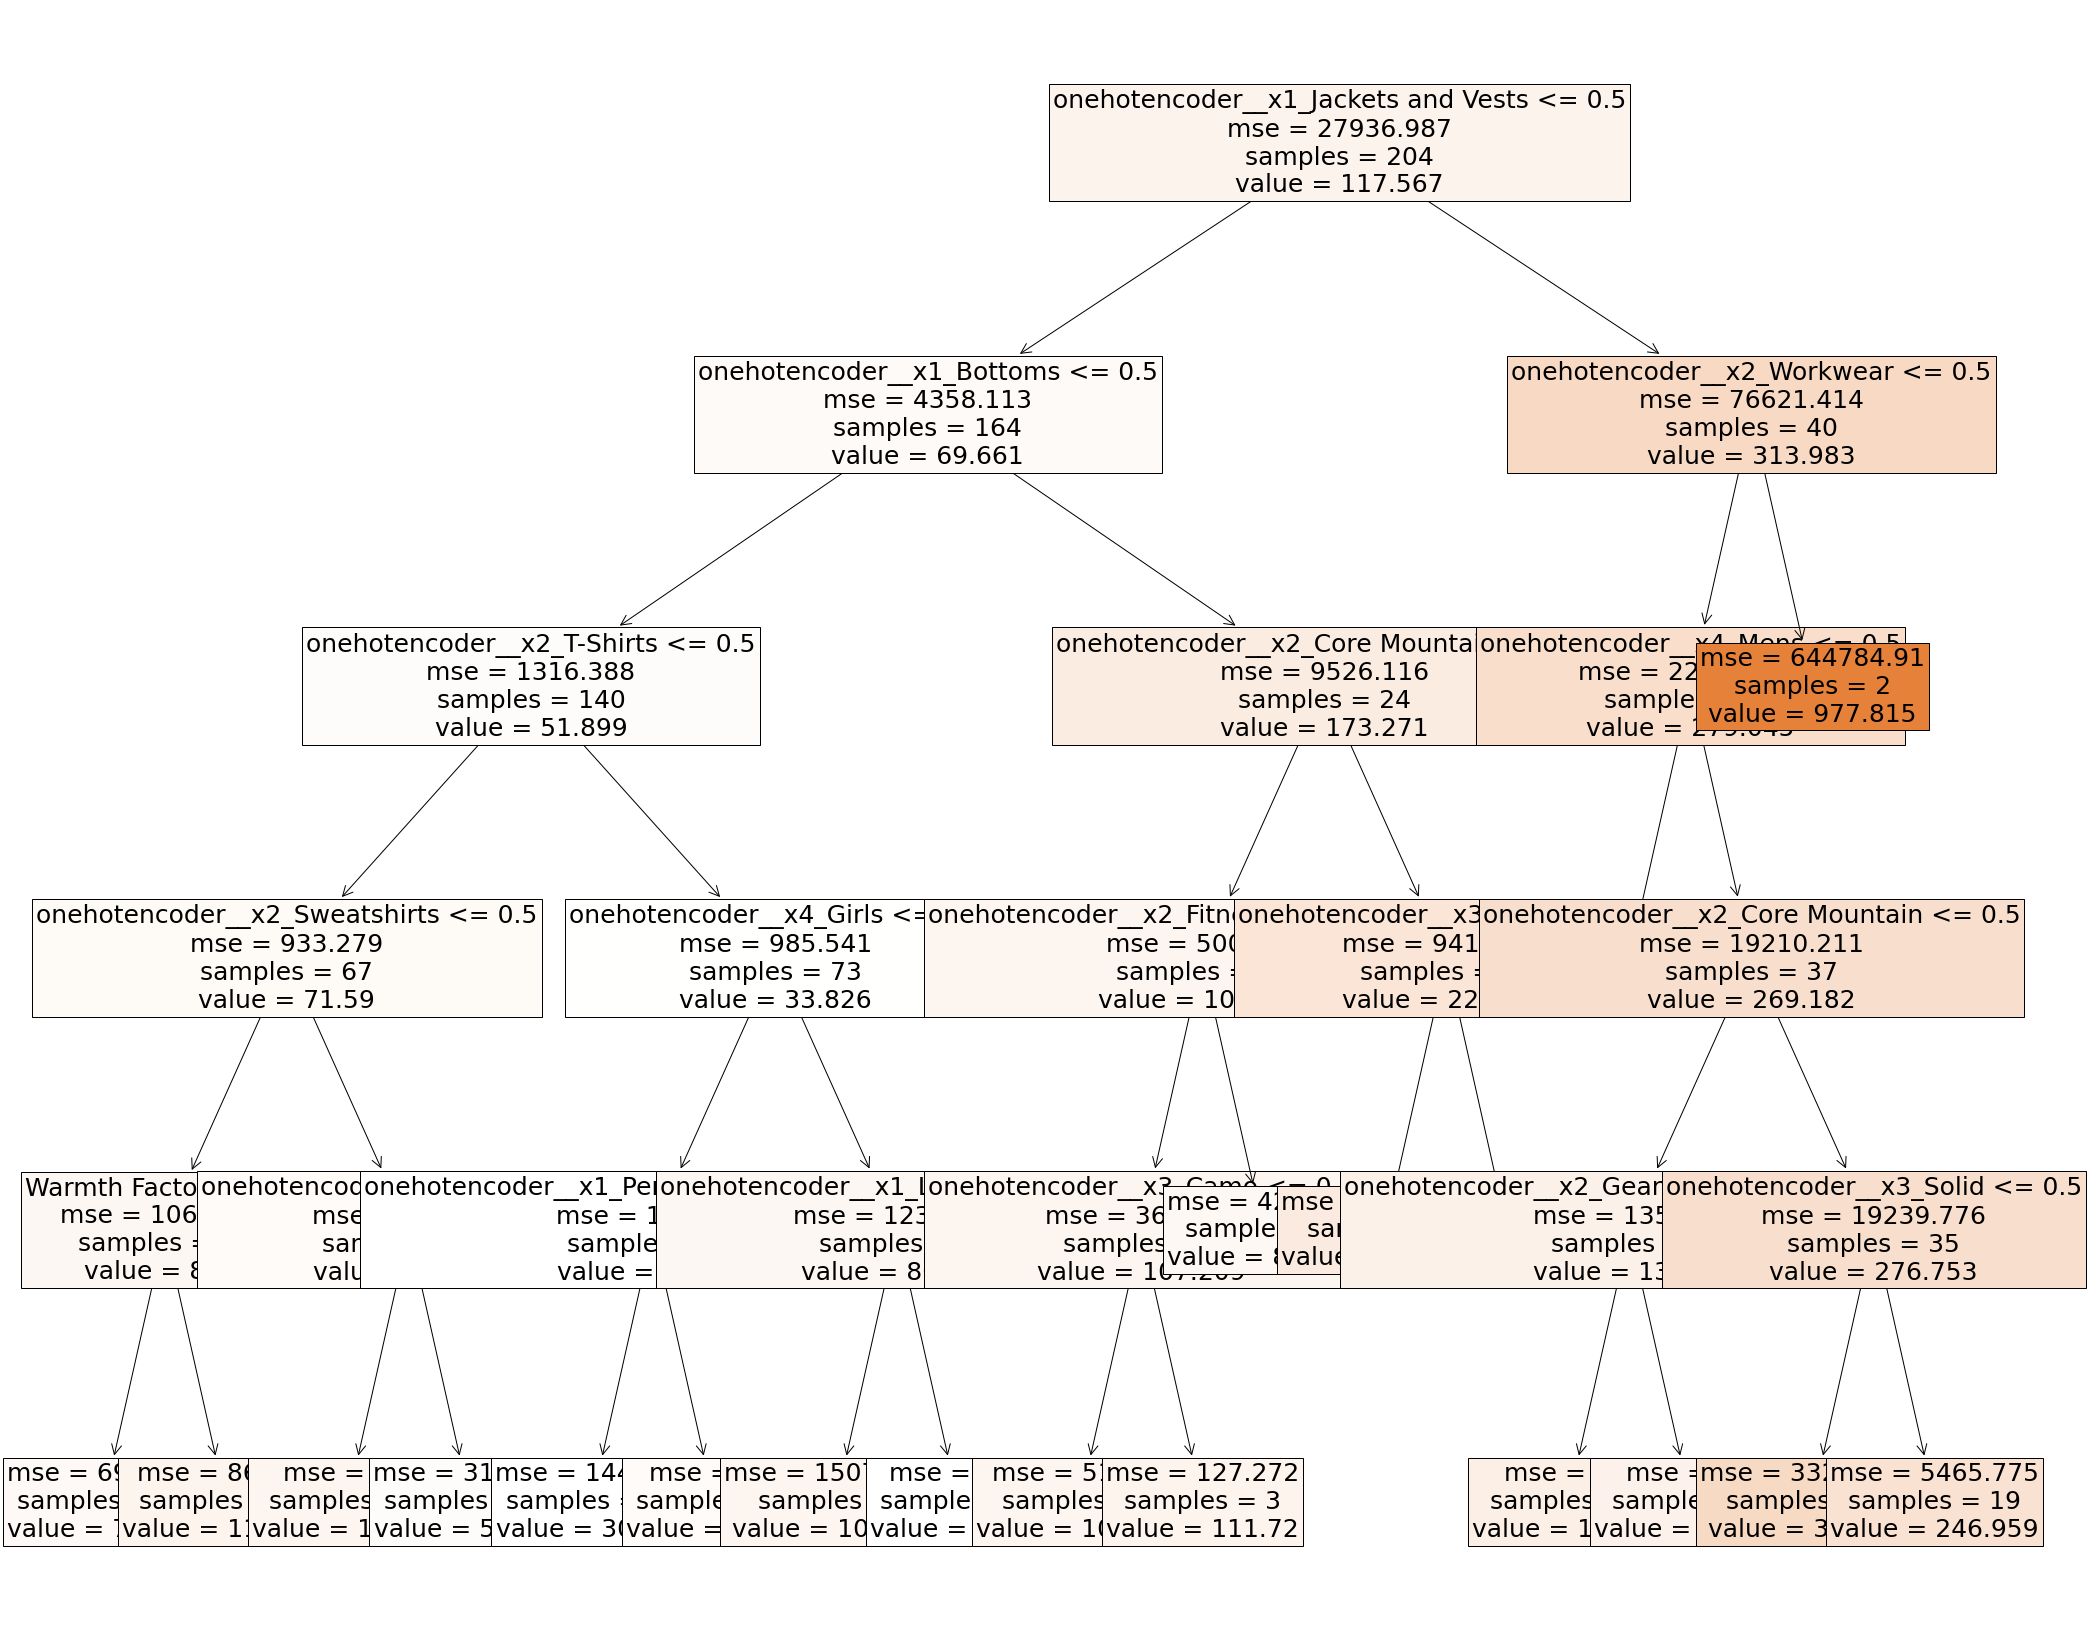

In [57]:
fig, ax = plt.subplots(figsize = (35,30))
plot_tree(dtree_test, feature_names = transformer.get_feature_names(),
         fontsize = 25, ax = ax, filled = True);

In [52]:
from sklearn.model_selection import cross_val_score
np.sqrt(-np.mean(cross_val_score(dtree, X_train_ohe, y_train, scoring = 'neg_mean_squared_error')))

137.11205120950572

In [53]:
np.sqrt(-np.mean(cross_val_score(dtree_test, X_test_ohe, y_test, scoring = 'neg_mean_squared_error')))

173.79349624664172

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [38]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train_ohe)
X_test_scaled = sscaler.transform(X_test_ohe)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.